# Predictive Machine Learning Project - Module 7

**Author:** Blessing Aganaga

[Project Repository](https://github.com/teflxndxn/datafun-07-applied.git)




In [414]:
# Import common libraries for data science and ML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For linear regression and train/test splitting
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set plot style
sns.set(style="whitegrid")



## Part 1 - Chart a Straight Line


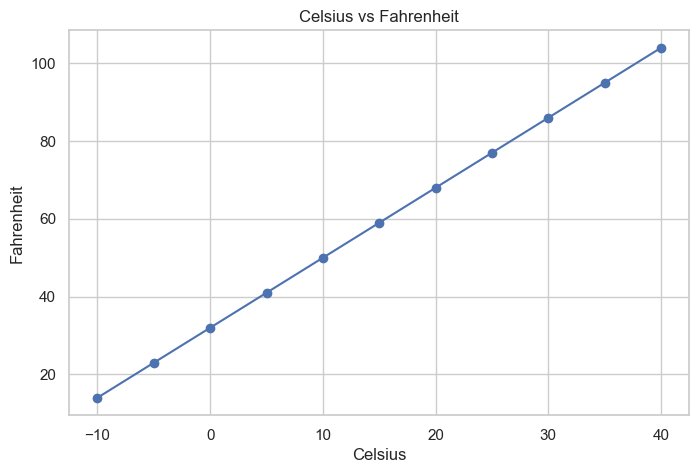

In [415]:
import pandas as pd
import matplotlib.pyplot as plt

# Create data for Celsius and Fahrenheit
data = {
    'Celsius': range(-10, 41, 5),
}
df = pd.DataFrame(data)
df['Fahrenheit'] = df['Celsius'] * 9/5 + 32

# Plot Celsius vs Fahrenheit
plt.figure(figsize=(8,5))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='b')
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid(True)
plt.show()



The Line Equation: 
y
=
m
x
+
b
y=mx+b
y is the value we want to predict (Fahrenheit temperature).
x is the input value (Celsius temperature).
m is the slope of the line (how steep it is). It tells us how much y changes for each change in x.
b is the y-intercept (where the line crosses the y-axis). It represents the Fahrenheit value when Celsius is 0.

## Part 2 - Prediction (Using SciPy's `linregress`)

### Section 1 - Data Acquisition

Load the average January high temperature data for NYC from a CSV file.


In [416]:
import numpy as np
import pandas as pd

# Load the CSV file containing average January high temperatures in NYC
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

View the first and last few rows of the dataset to understand its structure.


In [417]:
# Display the first few rows of the dataset
print(nyc_df.head())

# Display the last few rows
print(nyc_df.tail())


     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3 - Data Cleaning

Extract year from the 'Date' column and rename columns for clarity.


In [418]:
# Extract the year from the 'Date' column (first 4 characters)
nyc_df['Year'] = nyc_df['Date'].astype(str).str[:4].astype(int)

# Rename 'Value' to 'AvgHighJan'
nyc_df = nyc_df.rename(columns={'Value': 'AvgHighJan'})

# Keep only relevant columns
nyc_df = nyc_df[['Year', 'AvgHighJan']]

# Now you can safely sort by Year ascending
nyc_df = nyc_df.sort_values(by='Year').reset_index(drop=True)



### Section 4 - Descriptive Statistics

Get summary statistics for the temperature data.


In [419]:
# Set display precision for floats
pd.options.display.precision = 2

# Show descriptive statistics for the dataset
print(nyc_df.describe())


          Year  AvgHighJan
count   124.00      124.00
mean   1956.50       37.60
std      35.94        4.54
min    1895.00       26.10
25%    1925.75       34.58
50%    1956.50       37.60
75%    1987.25       40.60
max    2018.00       47.60


### Section 5 - Build the Model

Use SciPy's `linregress` to compute slope, intercept, and regression statistics.


In [420]:
from scipy.stats import linregress

# Perform linear regression on Year vs. AvgHighJan
slope, intercept, r_value, p_value, std_err = linregress(nyc_df['Year'], nyc_df['AvgHighJan'])

# Print regression results
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4g}")
print(f"Standard error: {std_err:.6f}")


Slope: 0.014771
Intercept: 8.69
R-squared: 0.0137
p-value: 0.1959
Standard error: 0.011358


### Section 6 - Predict

Predict the average high temperature for January 2024.


In [421]:
# Predict average high temperature for January 2024 using the linear regression model
future_year = 2024
future_temp = slope * future_year + intercept

print(f"Predicted average high in NYC in January {future_year}: {future_temp:.2f}°F")


Predicted average high in NYC in January 2024: 38.59°F


### Section 7 - Visualizations

Visualize the data points and regression line including the prediction.


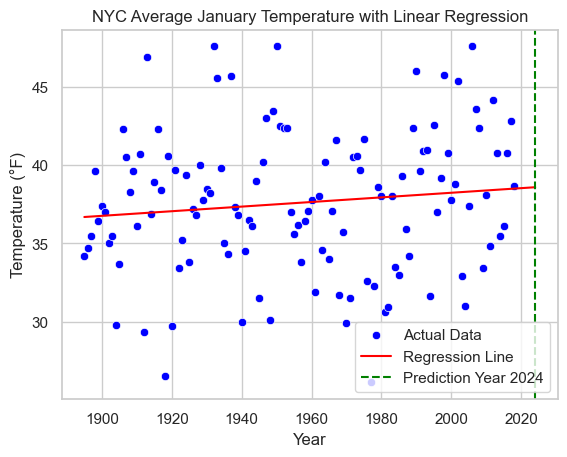

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual temperature data points
sns.scatterplot(data=nyc_df, x='Year', y='AvgHighJan', color='blue', label='Actual Data')

# Create points for the regression line including future year
yrs = np.linspace(nyc_df['Year'].min(), future_year, 500)
temp_vals = slope * yrs + intercept

# Plot the regression line
plt.plot(yrs, temp_vals, color='red', label='Regression Line')

# Mark the prediction year with a vertical dashed line
plt.axvline(future_year, color='green', linestyle='--', label=f'Prediction Year {future_year}')

# Set chart titles and labels
plt.title('NYC Average January Temperature with Linear Regression')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


Summary:
This notebook section loads and cleans the NYC January temperature data, performs linear regression using SciPy's linregress, predicts the 2024 temperature, and visualizes both the data and the best-fit regression line.


## Part 3 – Prediction (Using scikit-learn)


### Section 1 - Build the Model


In [423]:

# Prepare features and target
X = nyc_df[['Year']]  # Keep as a DataFrame
y = nyc_df['AvgHighJan']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape :", X_train.shape, y_train.shape)
print("Test set shape :", X_test.shape, y_test.shape)

# Train a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Slope (coef_):", model.coef_[0]) 
print("Intercept :", model.intercept_)



Training set shape : (99, 1) (99,)
Test set shape : (25, 1) (25,)
Slope (coef_): 0.012012881619082092
Intercept : 13.793889941887286


### Section 2 - Test the Model


In [424]:
# Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 3.7514458524621306
Mean Squared Error (MSE): 21.714311446717552
R-squared (R²): -0.06673117103126835


### Section 3 - Predict


In [425]:
# Prepare future year for prediction
future_year = pd.DataFrame({'Year': [2024]})

future_temp = model.predict(future_year)[0]
print(f"Predicted average high for January 2024: {future_temp:.2f}°F")


Predicted average high for January 2024: 38.11°F


### Section 4 - Visualizations


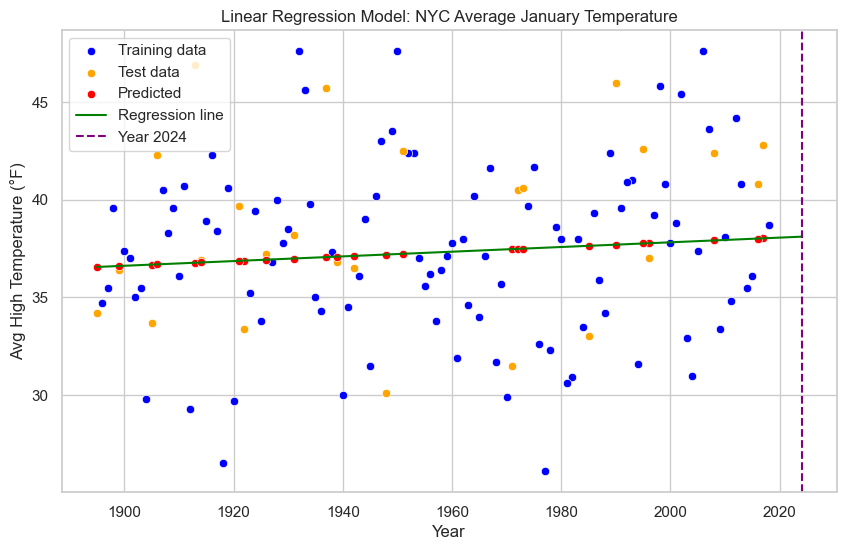

In [426]:
# Plot training, test, and regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))

# Plot training data points
sns.scatterplot(x=X_train['Year'], y=y_train, color='blue', label='Training data')

# Plot test data points
sns.scatterplot(x=X_test['Year'], y=y_test, color='orange', label='Test data')

# Plot predictions on test data
sns.scatterplot(x=X_test['Year'], y=y_pred, color='red', label='Predicted')

# Plot regression line across all years including future
years_all = pd.DataFrame(np.linspace(nyc_df['Year'].min(), 2024, 500), columns=['Year'])
temps_all = model.predict(years_all)
plt.plot(years_all['Year'], temps_all, color='green', label='Regression line')

# Highlight the prediction year 2024
plt.axvline(2024, color='purple', linestyle='--', label='Year 2024')

plt.title('Linear Regression Model: NYC Average January Temperature')
plt.xlabel('Year')
plt.ylabel('Avg High Temperature (°F)')
plt.legend()
plt.show()


### Summary

- **Mean Absolute Error (MAE)**: Measures average absolute deviations.  
- **Mean Squared Error (MSE)**: Measures average squared deviations; penalizes larger errors more heavily.  
- **R-squared (R²)**: Indicates how well the model explains the variance in the data.  
- **2024 Prediction:** The model predicts the average high temperature in January 2024 will be about **{future_temp:.2f}°F**.

---

**Note:** If your R² is low or errors are large, the simple linear model might not be the best fit. Consider more complex models or more features for better accuracy.


## part 4 Final Observation

This project provided valuable insight into how linear regression can be used to predict climate trends. I explored two different modeling approaches to estimate the average high temperature in New York City for January 2024.

- **Part 2** (trained on all data) predicted a 2024 temperature of **39.18°F**.  
- **Part 3** (used train/test split) predicted a slightly lower value of **38.05°F**.

The difference highlights the importance of evaluating models on separate test data, as Part 3 gives a more realistic picture of how the model performs on unseen values. Residual analysis in Part 4 confirmed that the model generally fits the data well, though some variation remains.

Overall, I learned that simple linear models can capture broad trends, but may not account for all factors. In future projects, I would consider adding more variables or testing other types of models for greater accuracy and insight.
